In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [65]:
df=pd.read_csv("D:/projects/Diwali Sales Data.csv",encoding='unicode_escape')
df.shape

(11251, 15)

In [66]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


Data CLEANING

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [13]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
df.shape

(11251, 13)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(11239, 13)

In [18]:
df['Amount']=df['Amount'].astype('int')

In [19]:
df['Amount'].dtype

dtype('int32')

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

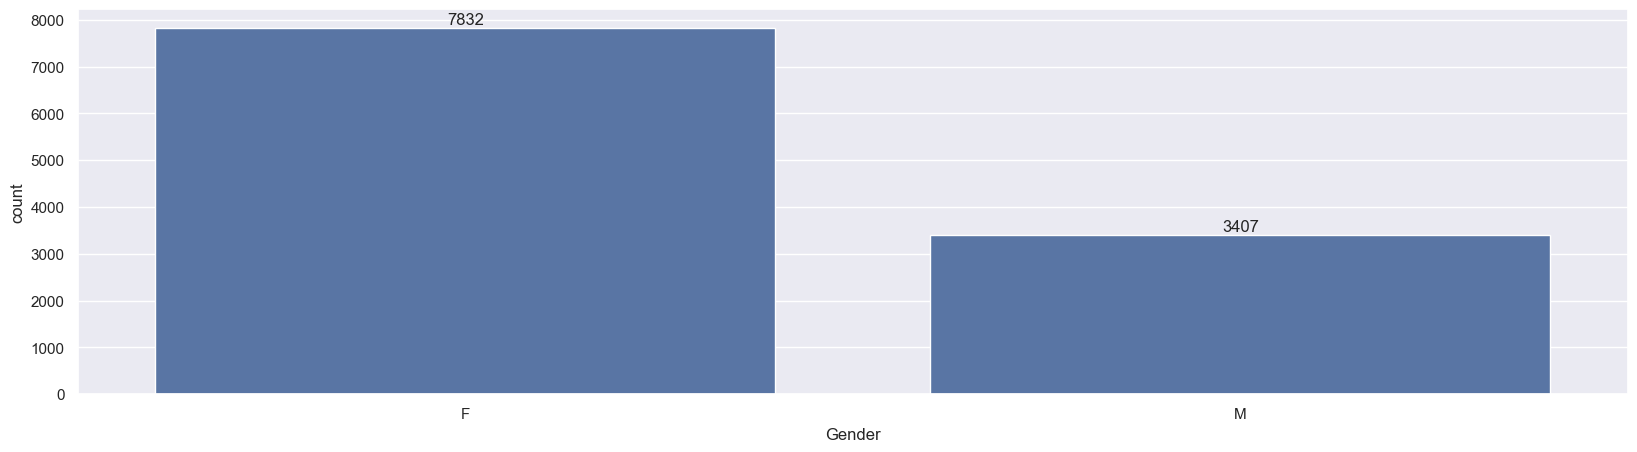

In [62]:
a=sb.countplot(x='Gender',
                data=df)
for bars in a.containers:
    a.bar_label(bars)

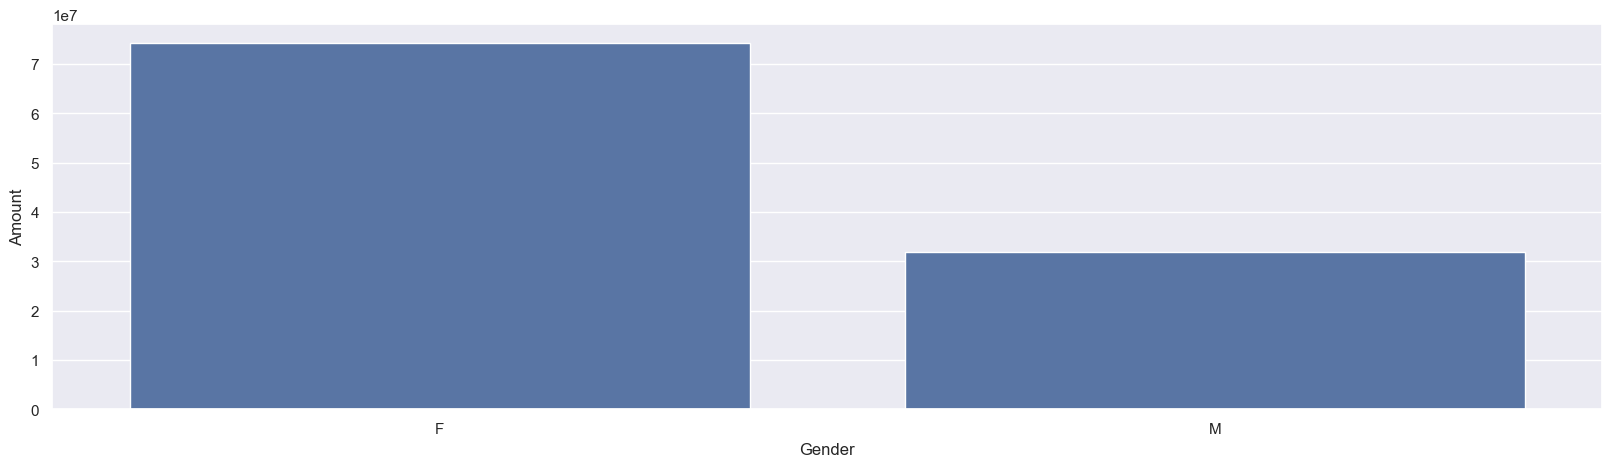

In [68]:
sales_gender = df.groupby(['Gender'],
                          as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sb.barplot(x='Gender',
            y='Amount',
            data=sales_gender)
plt.show()

From above two graphs we can see that most of the buyers are females and even the purchasing power of females are greater.

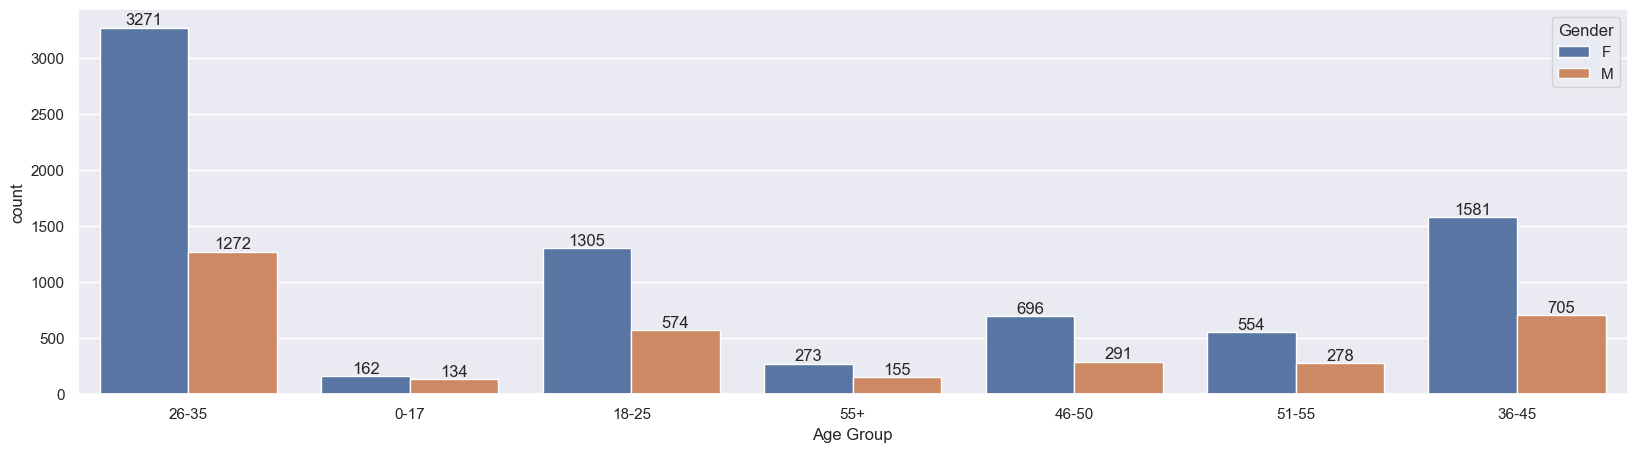

In [71]:
a=sb.countplot(data=df,
                x='Age Group',
                hue='Gender')
for bars in a.containers:
    a.bar_label(bars)

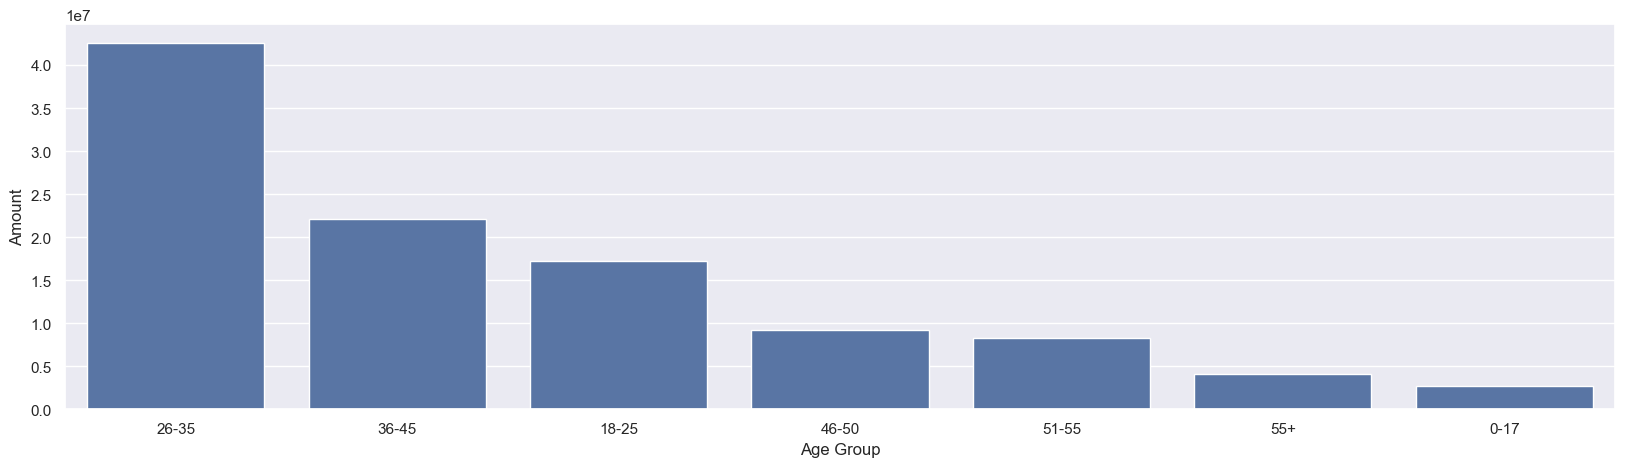

In [73]:
sales_age = df.groupby(['Age Group'],
                       as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sb.barplot(x='Age Group',
            y='Amount',
            data=sales_age)
plt.show()

From above two graphs we can see that most of the buyers are of age group between 26-35 years female.

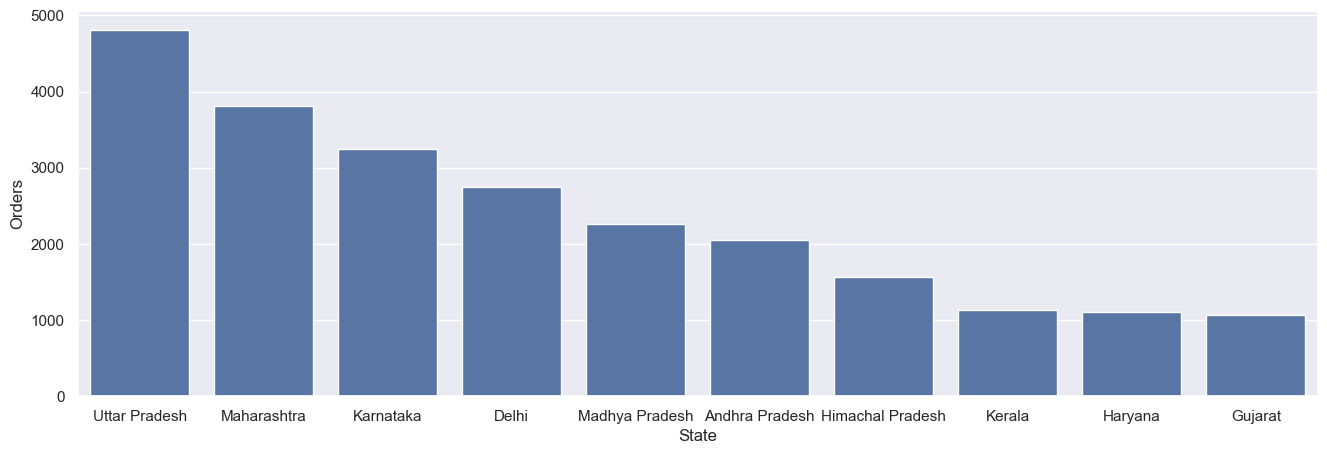

In [74]:
sales_state = df.groupby(['State'],
                         as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sb.set(rc={'figure.figsize':(16,5)})
sb.barplot(data=sales_state,
            x='State',
            y='Orders')
plt.show()

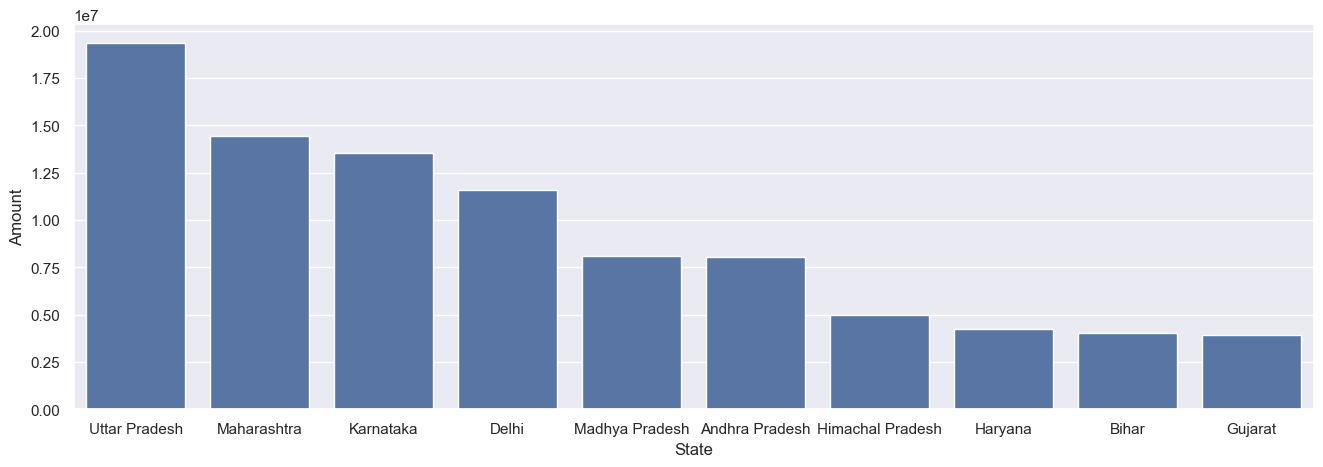

In [75]:
sales_state=df.groupby(['State'],
                       as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sb.set(rc={'figure.figsize':(16,5)})
sb.barplot(data=sales_state,
            x='State',
            y='Amount')
plt.show()

From above graphs we can see that most of the orders and total sales/amount are from UP, MH and KN respectively.

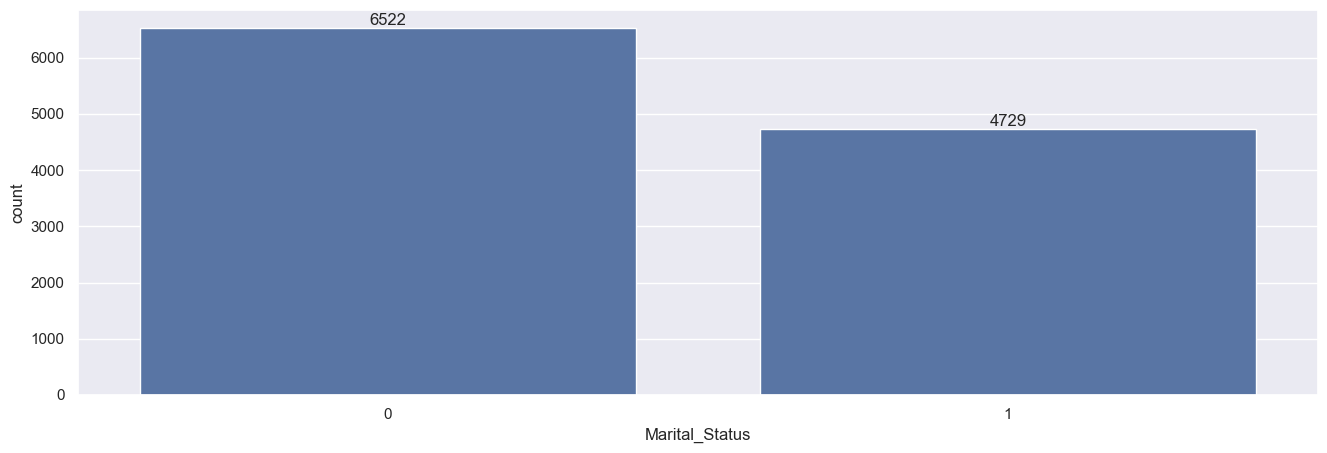

In [76]:
a=sb.countplot(data=df,
                x='Marital_Status')
for bars in a.containers:
    a.bar_label(bars)

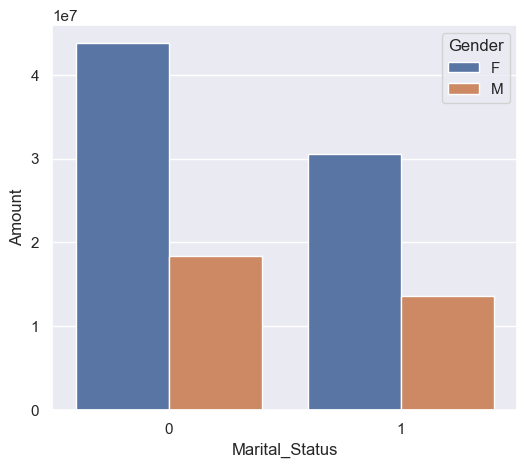

In [77]:
sales_state=df.groupby(['Marital_Status','Gender'],
                       as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sb.set(rc={'figure.figsize':(6,5)})
sb.barplot(data=sales_state,
            x='Marital_Status',
            y='Amount',
            hue='Gender')
plt.show()


Most of the buyers are married(women) and they have high purchasing power

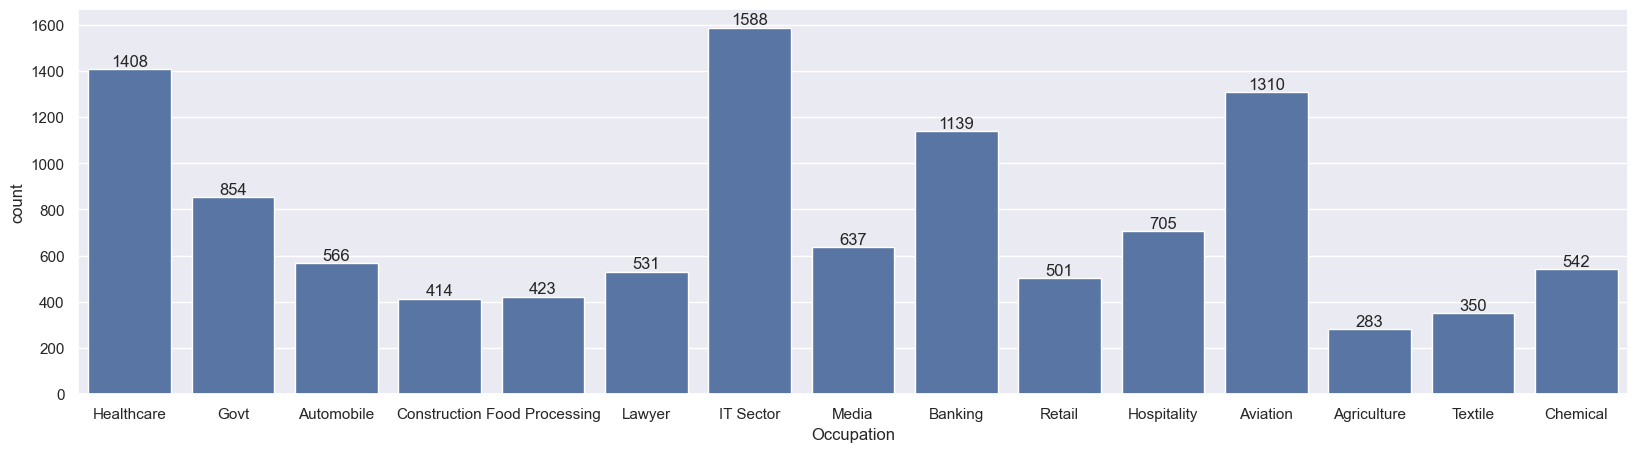

In [83]:
a=sb.countplot(data=df,
                x='Occupation')

for bars in a.containers:
    a.bar_label(bars)

sb.set(rc={'figure.figsize':(60,5)})

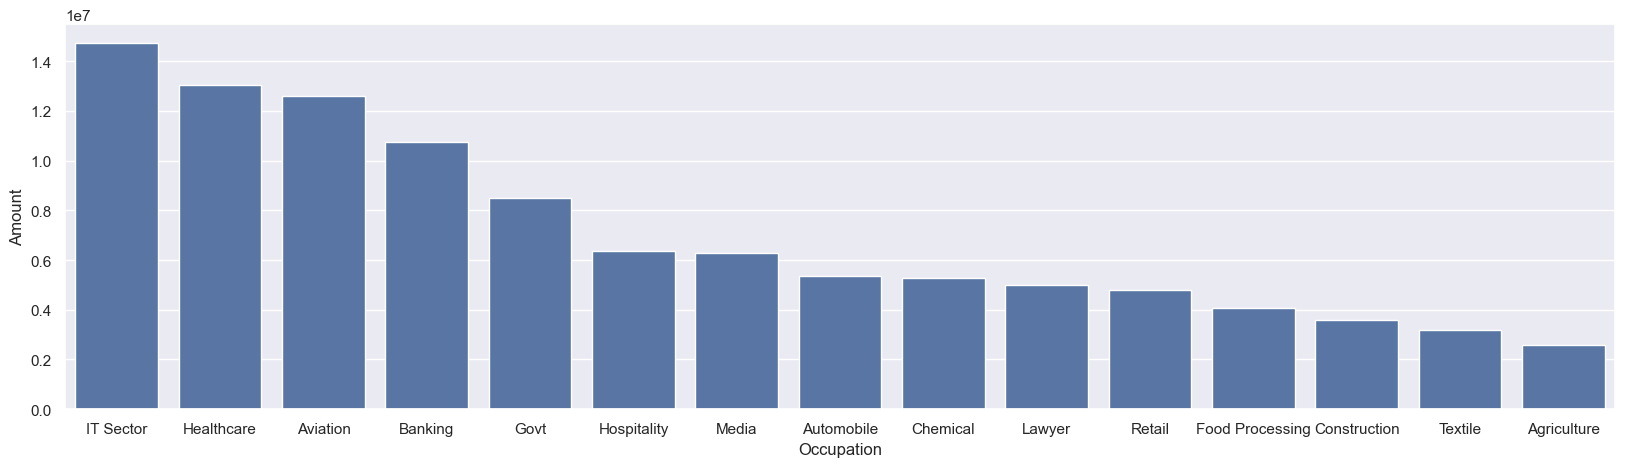

In [79]:
sales_state=df.groupby(['Occupation'],
                       as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sb.set(rc={'figure.figsize':(20,5)})
sb.barplot(data=sales_state,
            x='Occupation',
            y='Amount')
plt.show()

Most pf buyers are working in IT, Aviation and healthcare sector

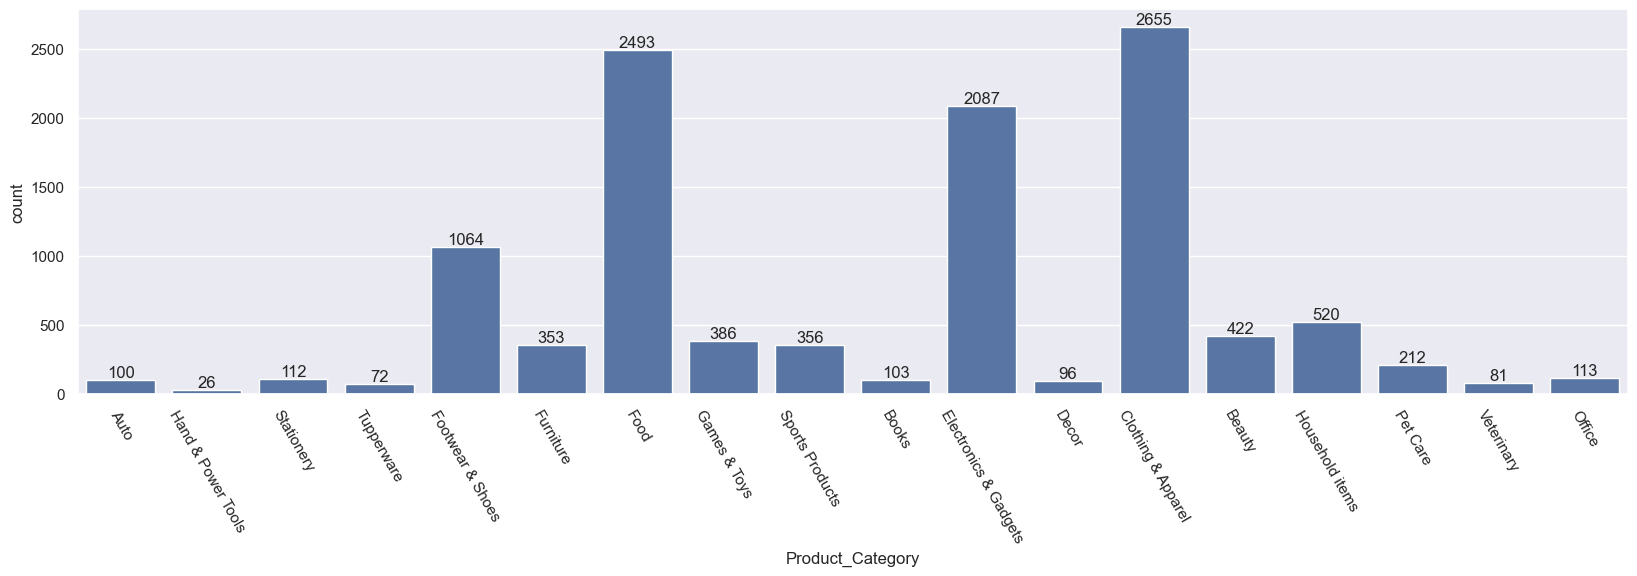

In [80]:
a=sb.countplot(data=df,
                x='Product_Category')

plt.xticks(rotation=300)

for bars in a.containers:
    a.bar_label(bars)

sb.set(rc={'figure.figsize':(20,5)})



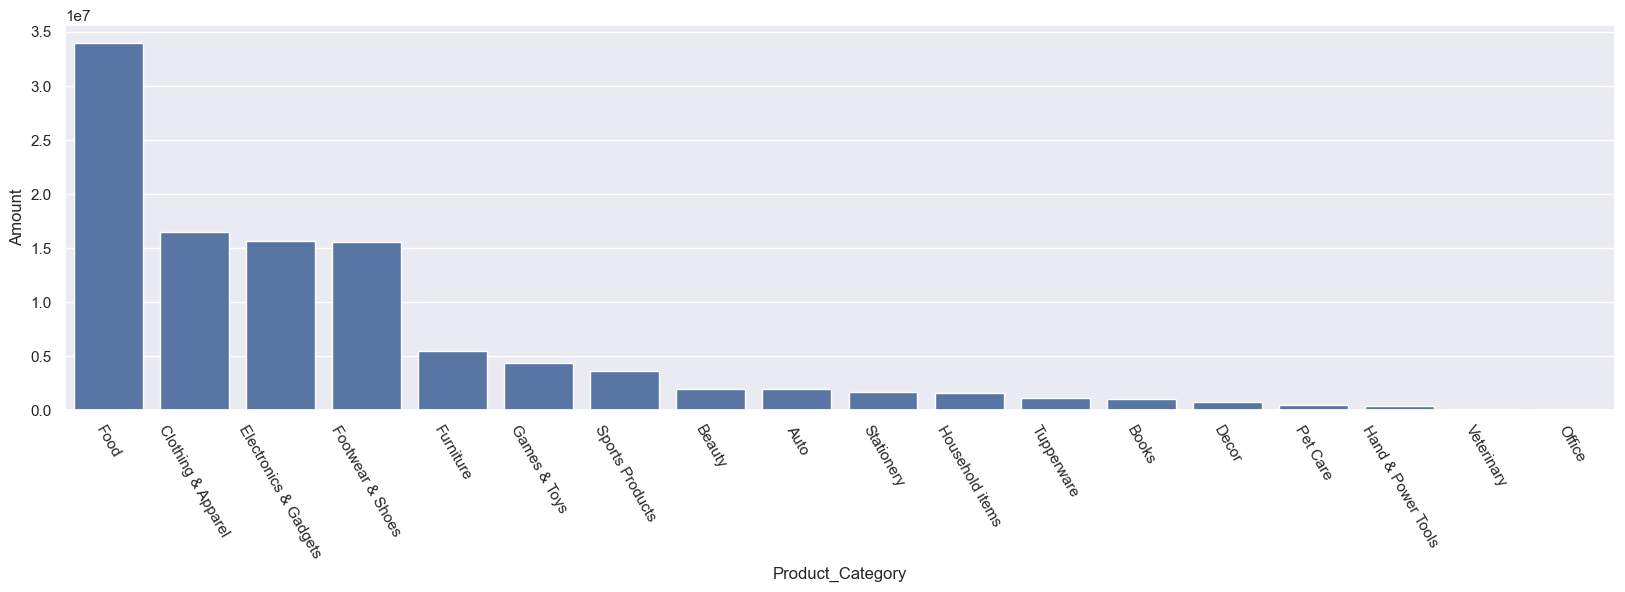

In [81]:
sales_state=df.groupby(['Product_Category'],
                       as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sb.set(rc={'figure.figsize':(20,5)})
sb.barplot(data=sales_state,
            x='Product_Category',
            y='Amount')
plt.xticks(rotation=300)
plt.show()

Most of sold products are from food, footwear and electronis category.

In [56]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

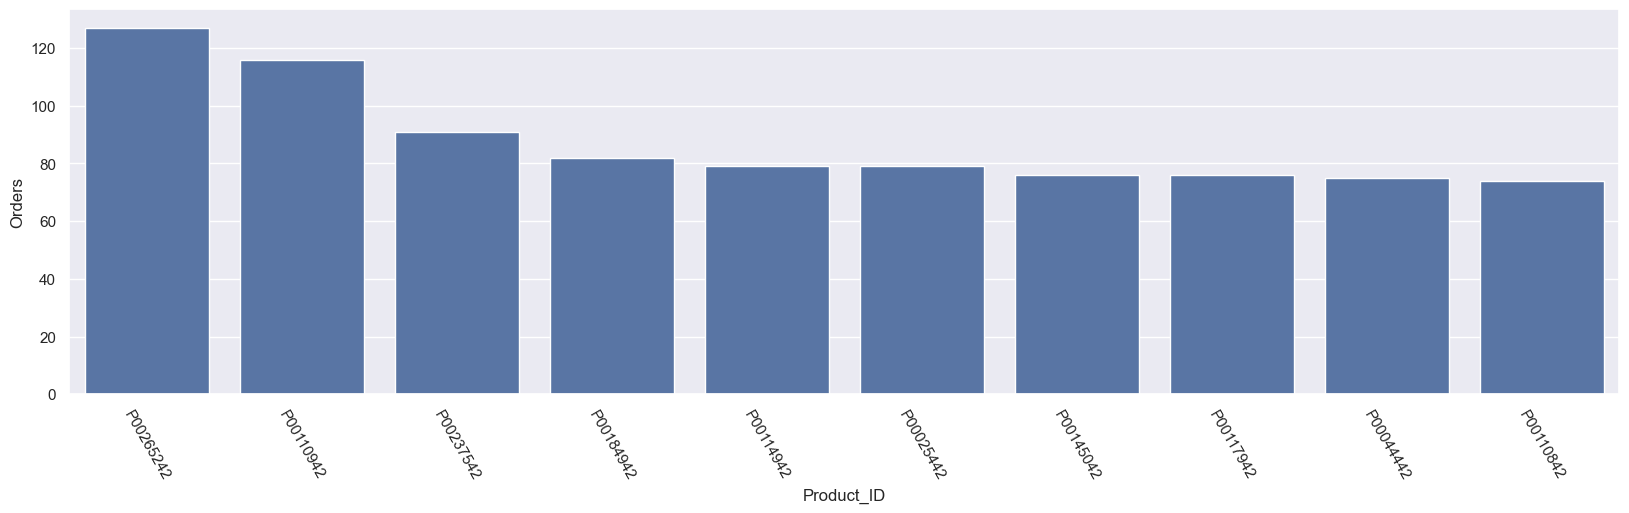

In [82]:
sales_state=df.groupby(['Product_ID'],
                       as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sb.set(rc={'figure.figsize':(20,5)})
sb.barplot(data=sales_state,
            x='Product_ID',
            y='Orders')
plt.xticks(rotation=300)
plt.show()

<Axes: xlabel='Product_ID'>

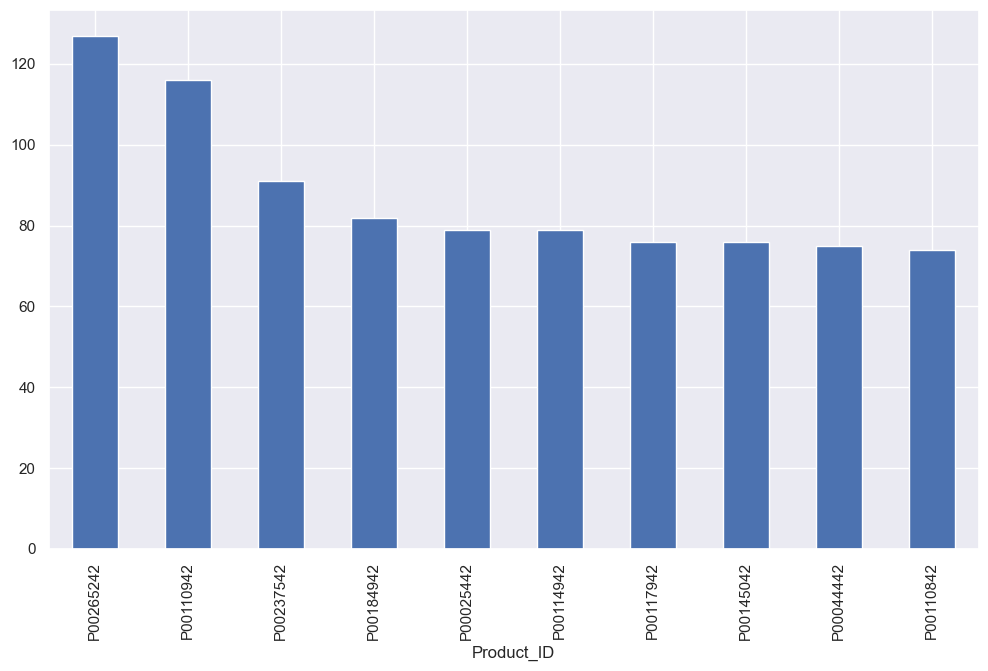

In [60]:
fig1,ax1=plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')


Conclusion:- Married women in age group 26-35 yeras from UP, MH and Karnataka working in IT, Healthcare 
             and aviation are more likely to buy products from Food, Clothing and Electronics category.